In [ ]:
import pandas as pd

In [ ]:
matches_data = pd.read_csv("/content/matches.csv")
deliveries_data = pd.read_csv("/content/deliveries.csv")

In [ ]:
matches_data.head(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


## **TOTAL MATCHES HELD IN EACH CITY**

In [ ]:
def calc_count(column_name):
  match_in_city = matches_data[column_name].value_counts()
  return match_in_city
match_in_city = calc_count("city")
match_in_city = match_in_city.reset_index()
match_in_city.columns=["city","match_count"]
match_in_city.head(5)

,city,match_count
0,Mumbai,173
1,Kolkata,93
2,Delhi,90
3,Chennai,85
4,Hyderabad,77


In [ ]:
import matplotlib.pyplot as plt
import pdb

def pie_plot(match_data,top_cities):

  columns_header_list = match_data.columns.tolist()
  match_data = match_data.sort_values(by="match_count",ascending =False)
  top_data = match_data.head(top_cities)
  input_data = top_data["match_count"]

  plt.figure(figsize=(12,12))
  # pdb.set_trace()

  # input_data.plot.pie(autopct ="%1.1f%%",startangle=140,cmap ="virdis",explode=[0.05]*len(input_data),labels =top_data[columns_header_list][0])
  input_data.plot.pie(autopct='%1.1f%%', startangle=140, cmap='viridis', explode=[0.05] * len(input_data),labels=top_data[columns_header_list[0]])

  plt.title("total Matchs held in Each state",fontsize =14)
  plt.ylabel("")
  plt.show()


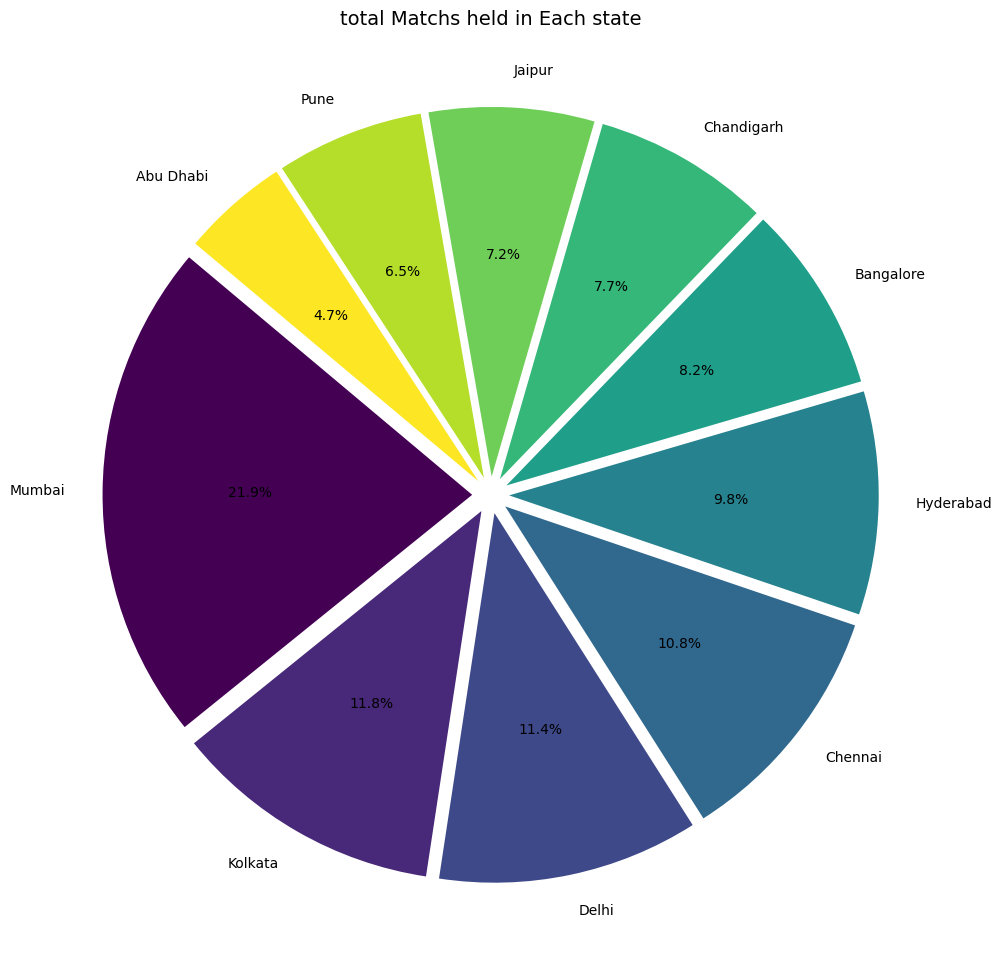

In [ ]:
pie_plot(match_in_city,10)

## **Top 10 bowlers with the highest number of wickets**

In [ ]:
#Display the top 10 bowlers and their wicket counts
top_bowlers.reset_index().rename(columns={"index": "Bowler", "bowler": "Wickets"})

,Wickets,count
0,SL Malinga,163
1,A Mishra,139
2,DJ Bravo,137
3,Harbhajan Singh,131
4,PP Chawla,129
5,R Vinay Kumar,123
6,A Nehra,117
7,Z Khan,115
8,R Ashwin,110
9,B Kumar,105


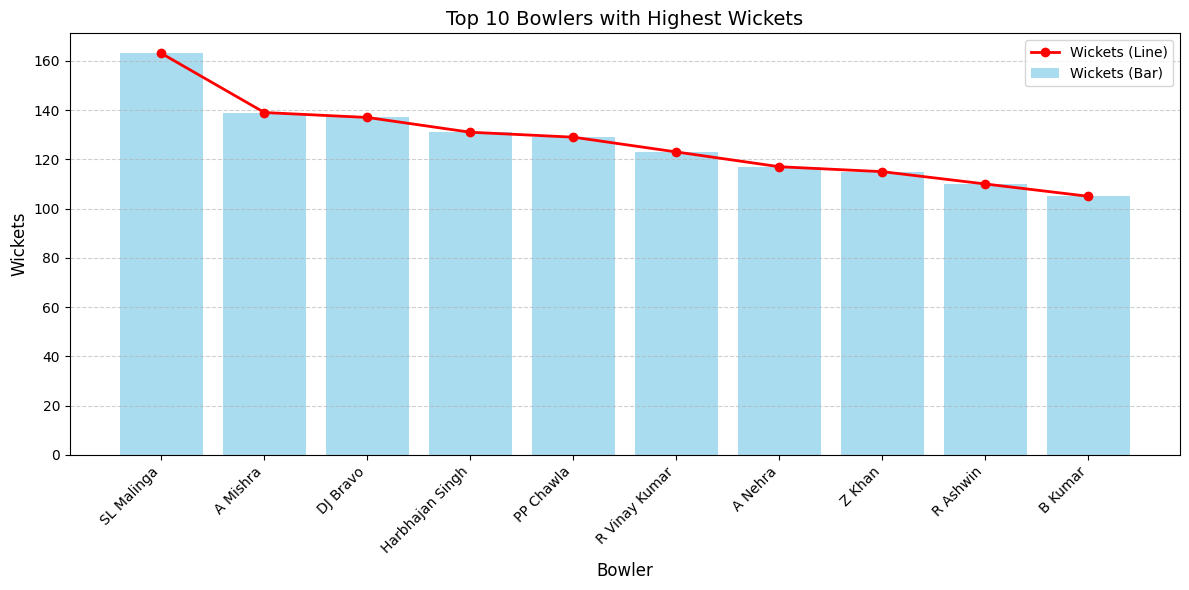

In [ ]:
import matplotlib.pyplot as plt

# Filter for rows where a wicket was taken
wickets_df = deliveries_data[deliveries_data['is_wicket'] == 1]

# Count the number of wickets for each bowler
top_bowlers = wickets_df['bowler'].value_counts().head(10)

# Extract names and counts for plotting
bowlers = top_bowlers.index
wicket_counts = top_bowlers.values

# Plot the data using a combination of line and bar charts
plt.figure(figsize=(12, 6))

# Bar chart
plt.bar(bowlers, wicket_counts, color='skyblue', label='Wickets (Bar)', alpha=0.7)

# Line chart
plt.plot(bowlers, wicket_counts, color='red', marker='o', label='Wickets (Line)', linewidth=2)

# Adding labels and title
plt.title('Top 10 Bowlers with Highest Wickets', fontsize=14)
plt.xlabel('Bowler', fontsize=12)
plt.ylabel('Wickets', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()


# **Top 10 batsmen with highest runs**

In [ ]:
# Display the top 10 batsmen and their total runs
top_batsmen.reset_index().rename(columns={"index": "Batsman", "batsman_runs": "Total Runs"})


,batter,Total Runs
0,SK Raina,4381
1,V Kohli,4269
2,RG Sharma,3928
3,G Gambhir,3863
4,DA Warner,3655
5,CH Gayle,3588
6,RV Uthappa,3564
7,AB de Villiers,3407
8,MS Dhoni,3393
9,S Dhawan,3317


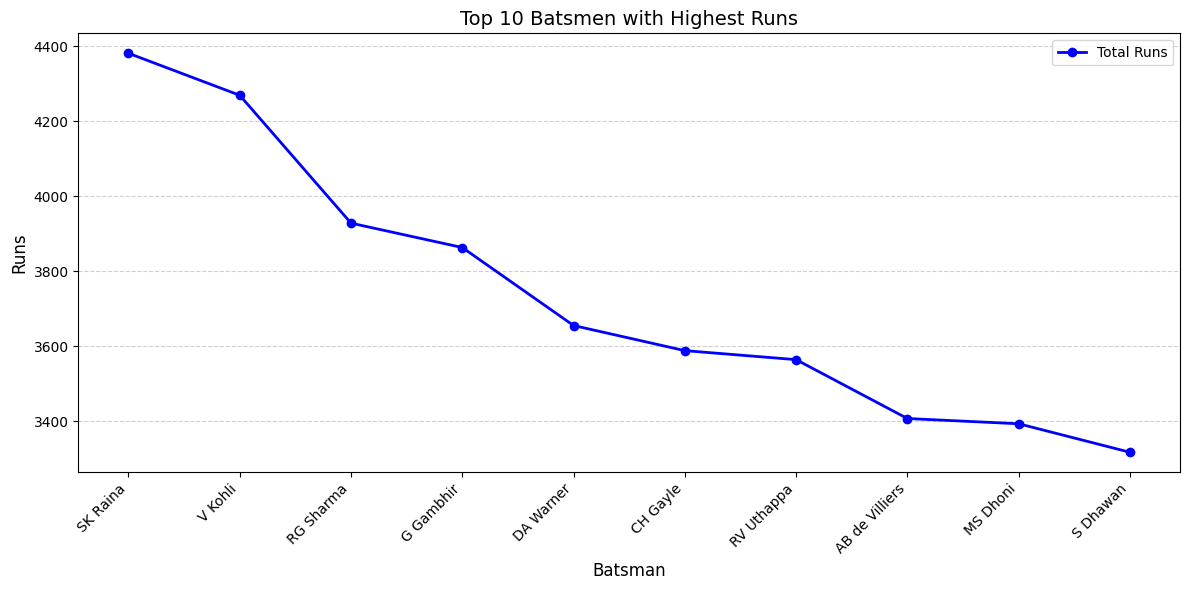

In [ ]:
# Calculate the total runs scored by each batsman
top_batsmen = deliveries_data.groupby('batter')['batsman_runs'].sum().nlargest(10)

# Extract names and runs for plotting
batsmen = top_batsmen.index
runs = top_batsmen.values

# Plot the data using a line chart
plt.figure(figsize=(12, 6))

# Line chart
plt.plot(batsmen, runs, color='blue', marker='o', linestyle='-', linewidth=2, label='Total Runs')

# Adding labels and title
plt.title('Top 10 Batsmen with Highest Runs', fontsize=14)
plt.xlabel('Batsman', fontsize=12)
plt.ylabel('Runs', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

# **Strike Rate Calculation for batsman with threshold**

In [ ]:
# Define the minimum run threshold
min_run_threshold = 500

# Calculate total runs and balls faced for each batsman
batsman_stats = deliveries_data.groupby('batter').agg(
    total_runs=('batsman_runs', 'sum'),
    balls_faced=('ball', 'count')
)

# Filter batsmen based on the minimum run threshold
filtered_batsmen = batsman_stats[batsman_stats['total_runs'] >= min_run_threshold]

# Calculate the strike rate
filtered_batsmen['strike_rate'] = (
    filtered_batsmen['total_runs'] / filtered_batsmen['balls_faced'] * 100
)

# Sort by strike rate in descending order
filtered_batsmen = filtered_batsmen.sort_values(by='strike_rate', ascending=False)

# Display the result
print(filtered_batsmen.head(10))


                total_runs  balls_faced  strike_rate
batter                                              
AD Russell             574          350   164.000000
GJ Maxwell            1112          703   158.179232
V Sehwag              2728         1833   148.827059
AB de Villiers        3407         2334   145.972579
CH Gayle              3588         2460   145.853659
YK Pathan             2876         2025   142.024691
KA Pollard            2148         1529   140.483976
DA Miller             1563         1135   137.709251
DA Warner             3655         2667   137.045369
JA Morkel              975          712   136.938202


<ipython-input-26-408c512d099a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_batsmen['strike_rate'] = (


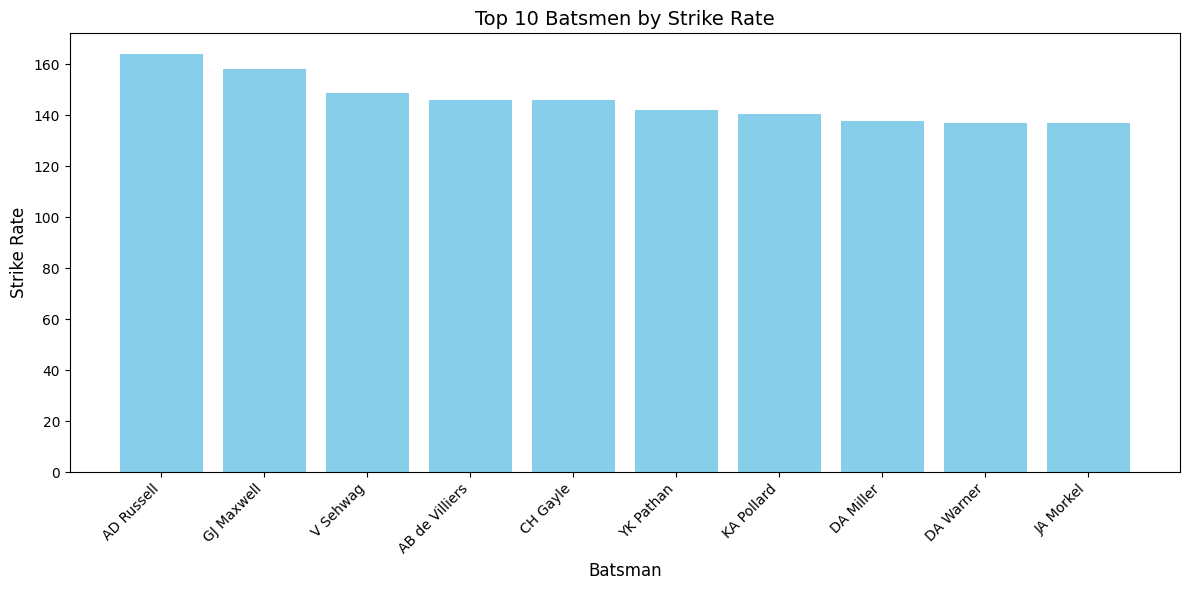

In [ ]:
# Plot the strike rate of the top 10 batsmen
top_batsmen = filtered_batsmen.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_batsmen.index, top_batsmen['strike_rate'], color='skyblue')
plt.xlabel('Batsman', fontsize=12)
plt.ylabel('Strike Rate', fontsize=12)
plt.title('Top 10 Batsmen by Strike Rate', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
matches_data.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

# **Top 10 player with most player of the match awards**

In [ ]:
# Count Player of the Match awards
top_players = matches_data['player_of_match'].value_counts().head(10)

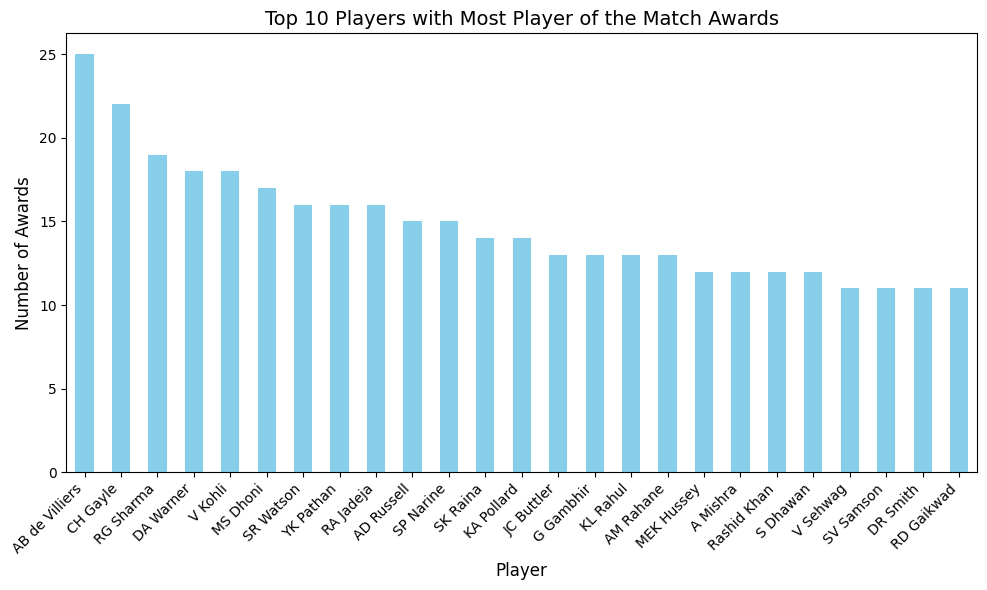

In [ ]:
import matplotlib.pyplot as plt

def bar_plot_for_players(matches_data, top_players_count=10):
    # Count the number of "Player of the Match" awards for each player
    player_awards = matches_data['player_of_match'].value_counts().head(top_players_count)

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    player_awards.plot(kind='bar', color="skyblue")

    # Add titles and labels
    plt.title("Top 10 Players with Most Player of the Match Awards", fontsize=14)
    plt.xlabel("Player", fontsize=12)
    plt.ylabel("Number of Awards", fontsize=12)

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45, ha="right")

    # Layout adjustments to avoid label overlap
    plt.tight_layout()

    # Show the plot
    plt.show()
# Call the function with the matches dataframe to display the top 10 players
bar_plot_for_players(matches_data, top_players_count=25)


# **Number of wins for each team**


In [ ]:
# Calculate the number of wins for each team
team_wins = matches_data['winner'].value_counts()

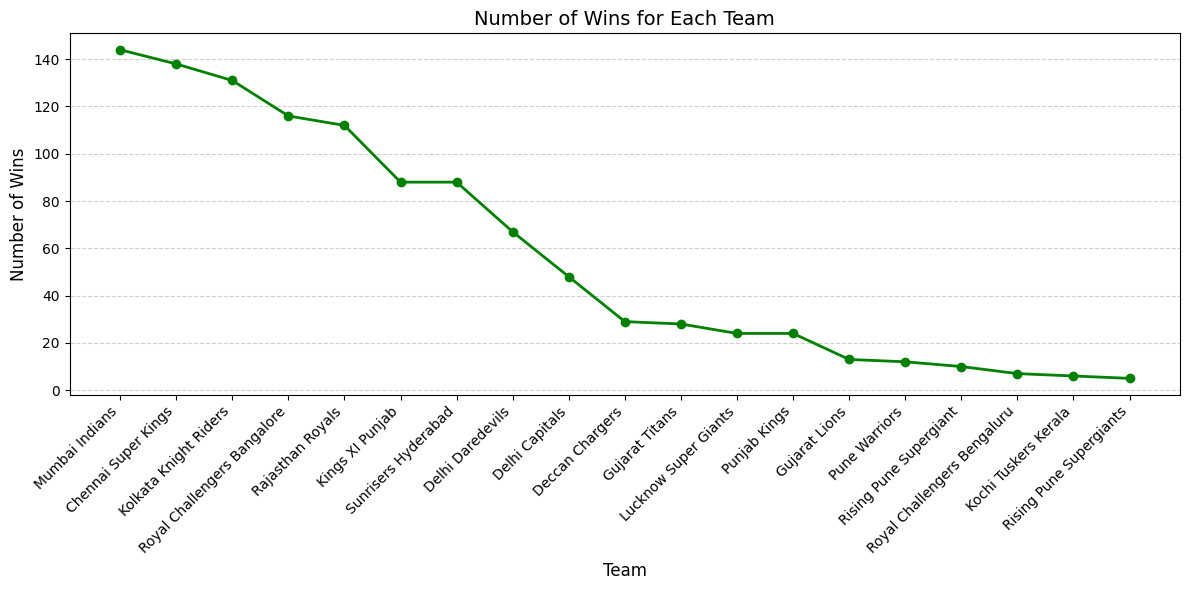

In [ ]:
# Plot the number of wins for each team
plt.figure(figsize=(12, 6))
plt.plot(team_wins.index, team_wins.values, marker='o', color='green', linestyle='-', linewidth=2)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Number of Wins', fontsize=12)
plt.title('Number of Wins for Each Team', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# **Top 10 Cities with Most IPL Matches Played**

In [ ]:
city_match_count =matches_data['city'].value_counts()
top_10_cities = city_match_count.head(10)
print(top_10_cities)

city
Mumbai        173
Kolkata        93
Delhi          90
Chennai        85
Hyderabad      77
Bangalore      65
Chandigarh     61
Jaipur         57
Pune           51
Abu Dhabi      37
Name: count, dtype: int64


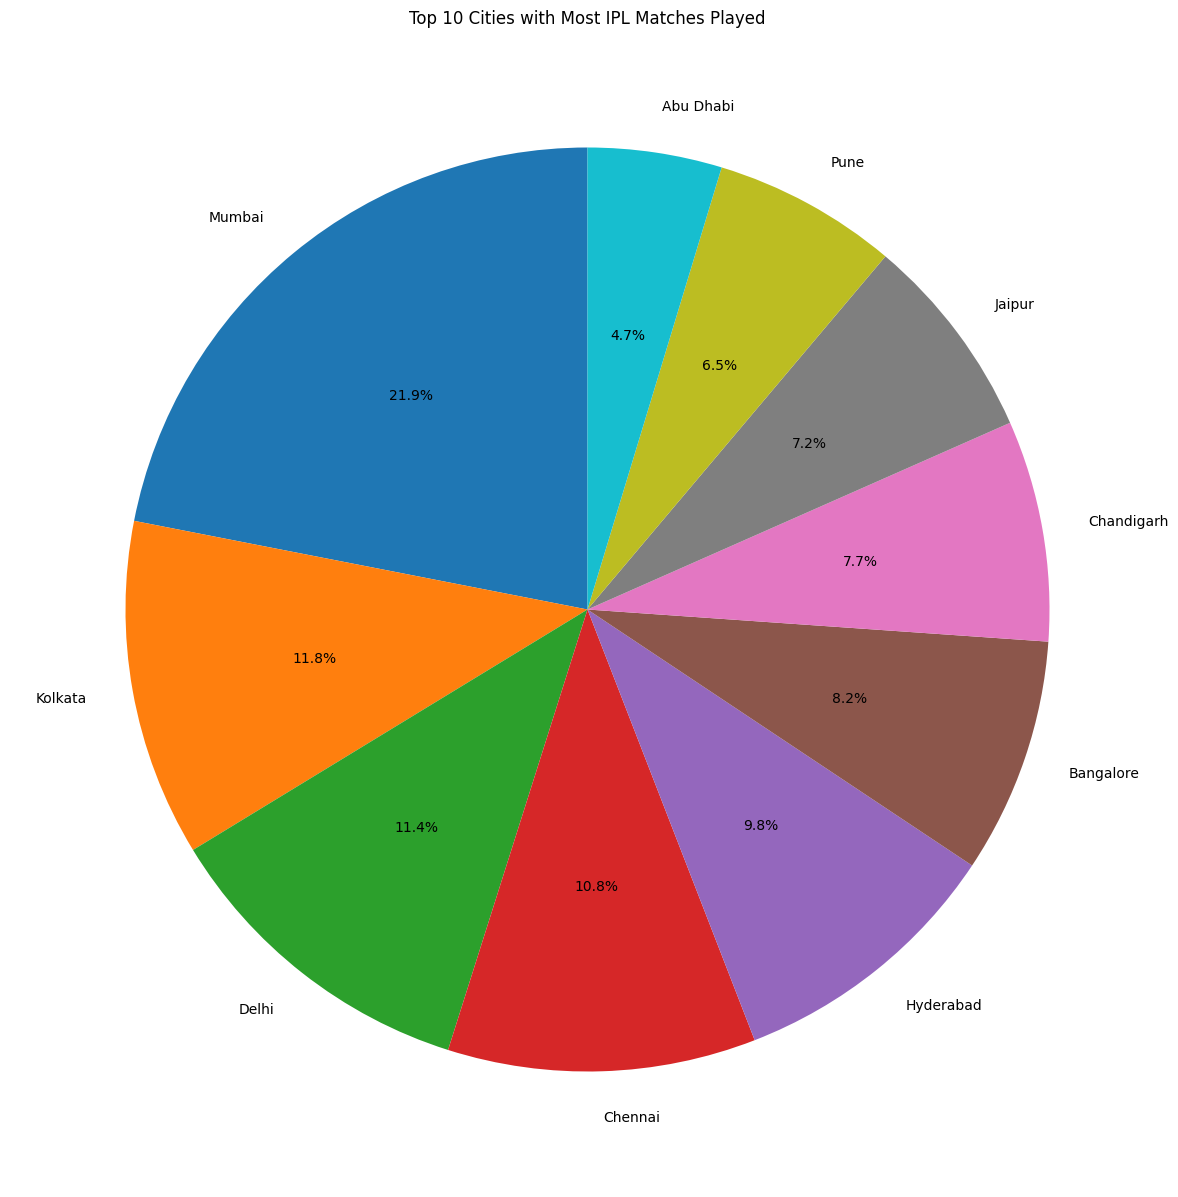

In [ ]:
# Plot the top 10 cities in a pie chart
plt.figure(figsize=(30, 15))
top_10_cities.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=False)
plt.title('Top 10 Cities with Most IPL Matches Played')
plt.ylabel('')  # Hides the y-axis label as it's not needed in a pie chart
plt.show()